In [159]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [9]:
train_dir = '/uscms/home/bweiss/nobackup/smart-pixels/dataset_2s_50x12P5_parquets/train_test_2s'

In [10]:
pd.read_csv(os.path.join(train_dir,'TestSetPt.csv'))

,pt
0,2.5575
1,1.7065
2,1.9615
3,1.5965
4,-2.5775
...,...
2040211,-0.5375
2040212,0.3355
2040213,-0.4005
2040214,-0.3685


In [13]:
csv_files = [f for f in os.listdir(train_dir) if f.endswith('.csv')]

for f in csv_files:
    print(f)

FullTestData.csv
FullPrecisionInputTestSet.csv
TestSetLabel.csv
TestSetPt.csv


In [15]:
pd.read_csv(os.path.join(train_dir,'FullTestData.csv'))

,0,1,2,3,4,5,6,7,8,9,10,11,12,y-local,cls,pt
0,0.0,0.0,0.0,864.0,17379.0,20934.0,22751.0,4152.0,0.0,0.0,0.0,0.0,0.0,-1.71100,0,2.5575
1,0.0,0.0,0.0,686.0,12115.0,10639.0,15783.0,6018.0,0.0,0.0,0.0,0.0,0.0,-2.66939,0,1.7065
2,0.0,0.0,0.0,0.0,131.0,7039.0,8831.0,1877.0,0.0,0.0,0.0,0.0,0.0,2.08771,0,1.9615
3,0.0,0.0,0.0,5622.0,18582.0,16191.0,212.0,0.0,0.0,0.0,0.0,0.0,0.0,2.19853,0,1.5965
4,0.0,0.0,0.0,738.0,15120.0,12298.0,17927.0,10023.0,0.0,0.0,0.0,0.0,0.0,-4.16523,0,-2.5775
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2040211,0.0,0.0,8911.0,37848.0,16983.0,9165.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-1.82885,0,-0.5375
2040212,3547.0,1875.0,1702.0,1585.0,1425.0,13048.0,34712.0,13072.0,0.0,0.0,0.0,0.0,0.0,4.52152,0,0.3355
2040213,0.0,0.0,0.0,8.0,7113.0,12462.0,14243.0,15767.0,4918.0,0.0,0.0,0.0,0.0,-6.73840,0,-0.4005
2040214,0.0,0.0,0.0,0.0,4596.0,25590.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5.44171,0,-0.3685


In [62]:
plist = []
prefile = pd.read_csv('./predictionsFiles_400eThresh.csv')
for pred in prefile.iloc[:, 0]:
    if pred == 0:
        plist.append(pred)
print(plist)

IOPub data rate exceeded.
The Jupyter server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--ServerApp.iopub_data_rate_limit`.

Current values:
ServerApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
ServerApp.rate_limit_window=3.0 (secs)



In [63]:
data = pd.read_csv(os.path.join(train_dir,'FullTestData.csv'))
ylocal = data['y-local']
print(ylocal)

0         -1.71100
1         -2.66939
2          2.08771
3          2.19853
4         -4.16523
            ...   
2040211   -1.82885
2040212    4.52152
2040213   -6.73840
2040214    5.44171
2040215   -3.38535
Name: y-local, Length: 2040216, dtype: float64


In [64]:
prefile = prefile.rename(columns={'0': 'predictions'})
new = pd.concat([prefile, ylocal], axis=1)
print(new)

         predictions  y-local
0                  0 -1.71100
1                  0 -2.66939
2                  0  2.08771
3                  0  2.19853
4                  0 -4.16523
...              ...      ...
2040211            0 -1.82885
2040212            0  4.52152
2040213            0 -6.73840
2040214            0  5.44171
2040215            0 -3.38535

[2040216 rows x 2 columns]


In [66]:
print(new['predictions'])

0          0
1          0
2          0
3          0
4          0
          ..
2040211    0
2040212    0
2040213    0
2040214    0
2040215    0
Name: predictions, Length: 2040216, dtype: int64


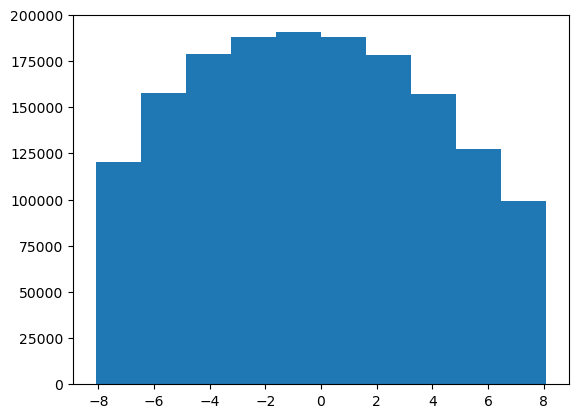

In [125]:
newer = new[new['predictions'] == 0]
ttlprdctns = plt.hist(newer['y-local'])

In [116]:
print(newer)

         predictions  y-local
0                  0 -1.71100
1                  0 -2.66939
2                  0  2.08771
3                  0  2.19853
4                  0 -4.16523
...              ...      ...
2040211            0 -1.82885
2040212            0  4.52152
2040213            0 -6.73840
2040214            0  5.44171
2040215            0 -3.38535

[1585982 rows x 2 columns]


In [69]:
tlist = []
tstfile = pd.read_csv('./testResults_400eThresh.csv')
for res in tstfile.iloc[:, 0]:
    if res == 0:
        tlist.append(res)
print(tlist)

IOPub data rate exceeded.
The Jupyter server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--ServerApp.iopub_data_rate_limit`.

Current values:
ServerApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
ServerApp.rate_limit_window=3.0 (secs)



In [70]:
tstfile = tstfile.rename(columns={'0':'results'})
mew = pd.concat([tstfile, ylocal], axis=1)
print(mew)

         results  y-local
0              0 -1.71100
1              0 -2.66939
2              0  2.08771
3              0  2.19853
4              0 -4.16523
...          ...      ...
2040211        0 -1.82885
2040212        0  4.52152
2040213        0 -6.73840
2040214        0  5.44171
2040215        0 -3.38535

[2040216 rows x 2 columns]


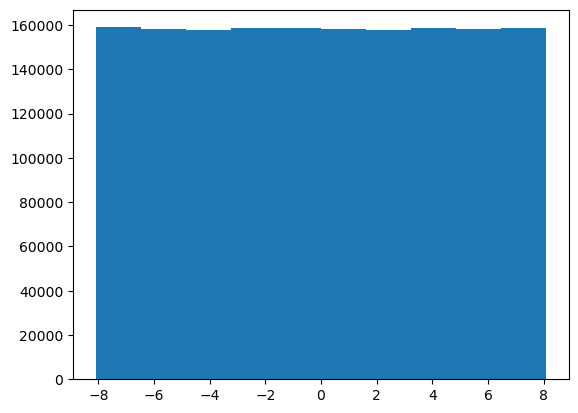

In [123]:
mewer = mew[mew['results'] == 0]
tstrslts = plt.hist(mewer['y-local'])

In [117]:
print(mewer)

         results  y-local
0              0 -1.71100
1              0 -2.66939
2              0  2.08771
3              0  2.19853
4              0 -4.16523
...          ...      ...
2040211        0 -1.82885
2040212        0  4.52152
2040213        0 -6.73840
2040214        0  5.44171
2040215        0 -3.38535

[1583923 rows x 2 columns]


In [134]:
end = pd.concat([prefile, tstfile, ylocal], axis = 1)
print(end)

         predictions  results  y-local
0                  0        0 -1.71100
1                  0        0 -2.66939
2                  0        0  2.08771
3                  0        0  2.19853
4                  0        0 -4.16523
...              ...      ...      ...
2040211            0        0 -1.82885
2040212            0        0  4.52152
2040213            0        0 -6.73840
2040214            0        0  5.44171
2040215            0        0 -3.38535

[2040216 rows x 3 columns]


In [132]:
#list2 = []
#for i, val in enumerate(end['y-local']):
#    if end['predictions'][i] == end['results'][i]:
#        pass
#    else:
#        list2.append(end['predictions'][i])
#wrong = pd.DataFrame({'false': list2})
#wronger = pd.concat([wrong, ylocal], axis=1)
#print(wronger)

In [133]:
#finale = wronger[wronger['false'] == 0]
#plt.hist(finale['y-local'])

In [115]:
print(finale)

        false  y-local
18200     0.0 -6.39195
18201     0.0 -8.01499
18203     0.0  4.48494
18204     0.0  5.88616
18206     0.0 -2.88906
...       ...      ...
592475    0.0  6.44691
592476    0.0 -5.15492
592481    0.0 -6.50556
592486    0.0  1.96394
592487    0.0  1.81901

[295016 rows x 2 columns]


In [83]:
print(end)

         predictions  results  y-local
0                  0        0 -1.71100
1                  0        0 -2.66939
2                  0        0  2.08771
3                  0        0  2.19853
4                  0        0 -4.16523
...              ...      ...      ...
2040211            0        0 -1.82885
2040212            0        0  4.52152
2040213            0        0 -6.73840
2040214            0        0  5.44171
2040215            0        0 -3.38535

[2040216 rows x 3 columns]


In [98]:
end['predictions'][2] == end['results'][2]

True

In [135]:
list2 = []
for i, val in enumerate(end['y-local']):
    if end['predictions'][i] == end['results'][i]:
        list2.append(3)
    else:
        list2.append(end['predictions'][i])
wrong = pd.DataFrame({'false': list2})
wronger = pd.concat([wrong, ylocal], axis=1)
print(wronger)

         false  y-local
0            3 -1.71100
1            3 -2.66939
2            3  2.08771
3            3  2.19853
4            3 -4.16523
...        ...      ...
2040211      3 -1.82885
2040212      3  4.52152
2040213      3 -6.73840
2040214      3  5.44171
2040215      3 -3.38535

[2040216 rows x 2 columns]


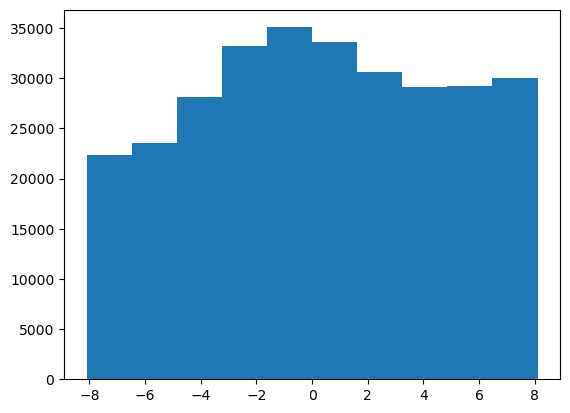

In [136]:
finale = wronger[wronger['false'] == 0]
flsprdctns = plt.hist(finale['y-local'])

(array([[120369., 157612., 178955., 188272., 190630., 187866., 178305.,
         157428., 127157.,  99388.],
        [142711., 181149., 207082., 221503., 225708., 221497., 208934.,
         186580., 156423., 129411.]]),
 array([-8.09999 , -6.479992, -4.859994, -3.239996, -1.619998,  0.      ,
         1.619998,  3.239996,  4.859994,  6.479992,  8.09999 ]),
 <a list of 2 BarContainer objects>)

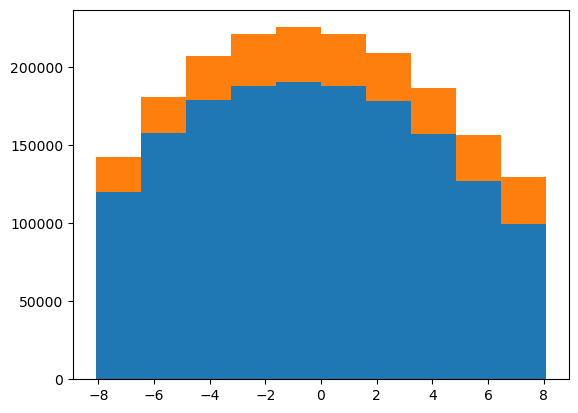

In [137]:
plt.hist([newer['y-local'], finale['y-local']], stacked=True)

In [129]:
print(len(newer['y-local']))

1585982


In [130]:
print(len(finale['y-local']))

295016


In [131]:
print(len(mewer['y-local']))

1583923


In [152]:
list3 = []
for i, val in enumerate(end['y-local']):
    if end['predictions'][i] == end['results'][i]:
        list3.append(end['predictions'][i])
    else:
        list3.append(3)
nope = pd.DataFrame({'true': list3})
noper = pd.concat([nope, ylocal], axis=1)
print(noper)

         true  y-local
0           0 -1.71100
1           0 -2.66939
2           0  2.08771
3           0  2.19853
4           0 -4.16523
...       ...      ...
2040211     0 -1.82885
2040212     0  4.52152
2040213     0 -6.73840
2040214     0  5.44171
2040215     0 -3.38535

[2040216 rows x 2 columns]


(array([ 98027., 134075., 150828., 155041., 155552., 154235., 147676.,
        128276.,  97891.,  69365.]),
 array([-8.09999 , -6.479992, -4.859994, -3.239996, -1.619998,  0.      ,
         1.619998,  3.239996,  4.859994,  6.479992,  8.09999 ]),
 <BarContainer object of 10 artists>)

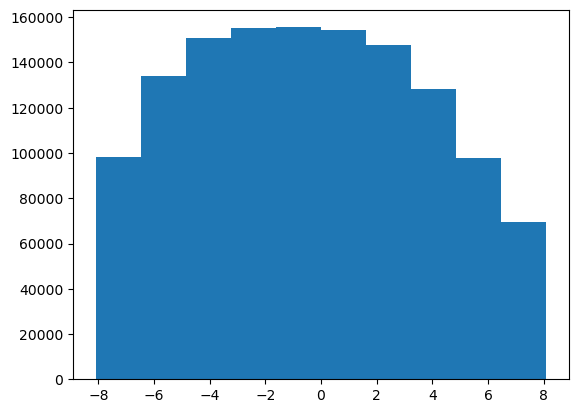

In [153]:
finale2 = noper[noper['true'] == 0]
plt.hist(finale2['y-local'])

(array([[ 98027., 134075., 150828., 155041., 155552., 154235., 147676.,
         128276.,  97891.,  69365.],
        [120369., 157612., 178955., 188272., 190630., 187866., 178305.,
         157428., 127157.,  99388.]]),
 array([-8.09999 , -6.479992, -4.859994, -3.239996, -1.619998,  0.      ,
         1.619998,  3.239996,  4.859994,  6.479992,  8.09999 ]),
 <a list of 2 BarContainer objects>)

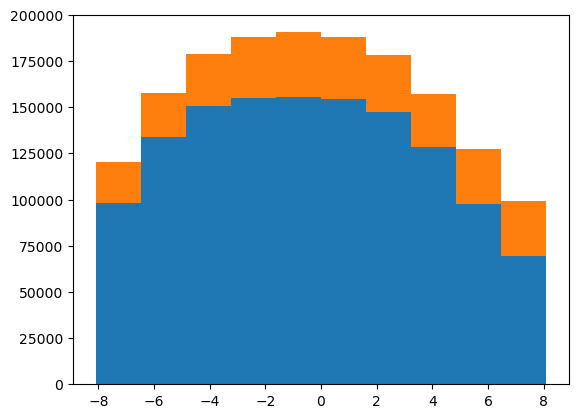

In [154]:
plt.hist([finale2['y-local'], finale['y-local']], stacked=True)

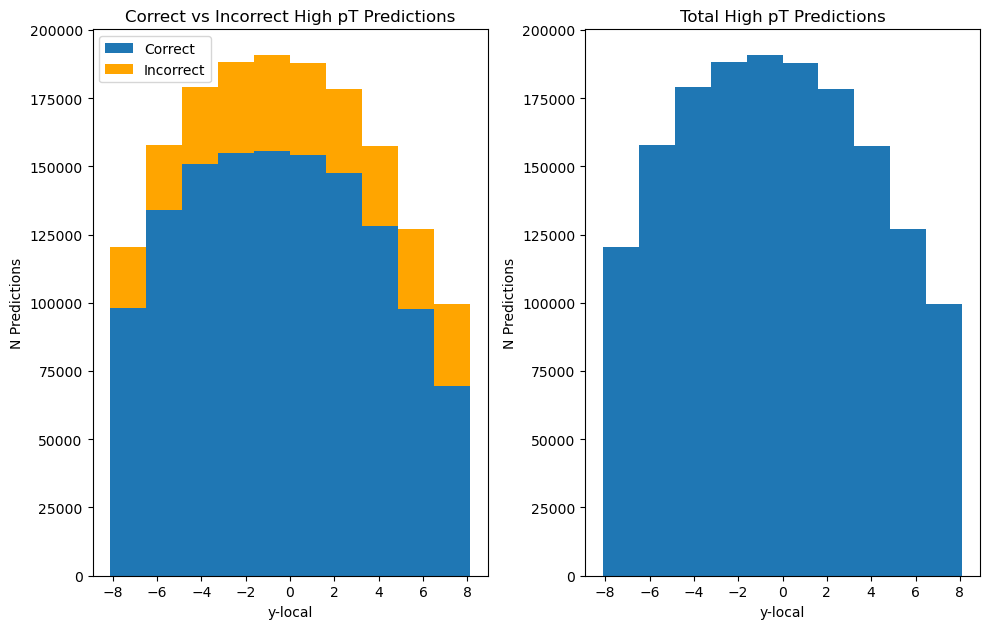

In [202]:
fig, axes = plt.subplots(1, 2, figsize=[10, 6.4])

axes[0].hist([finale2['y-local'], finale['y-local']], stacked=True, label=['Correct', 'Incorrect'], color=['#1f77b4', 'orange'])
axes[0].legend(loc='upper left')
axes[0].set_title("Correct vs Incorrect High pT Predictions")

axes[1].hist(newer['y-local'])
axes[1].set_title("Total High pT Predictions")

for ax in axes:
    ax.set_xlabel('y-local')
    ax.set_ylabel('N Predictions')

plt.tight_layout()
plt.show()